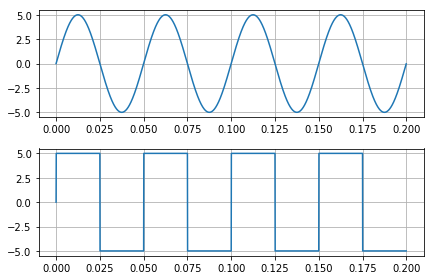

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.fftpack
import math

f = 20.0      # frequency, Hz
A = 5.0       # half-amplitude, without unit; total amplitude will be from -A to +A
T = 1.0 / f   # period, s
periods = 4   # how many periods to show
resolution = 1000  # x-axis finesse; without unit; how many points to plot per period

t = np.arange(0.0, periods * T, T / resolution)     # Return evenly spaced values within a given interval.

sin = A * np.sin(2 * np.pi * t * f)
square = A * np.sign(sin)

fig, (sn, sq) = plt.subplots(2, 1) #, figsize=(10,10))
sn.plot(t, sin)
sq.plot(t, square)
sn.grid()
sq.grid()

fig.tight_layout()
plt.show()


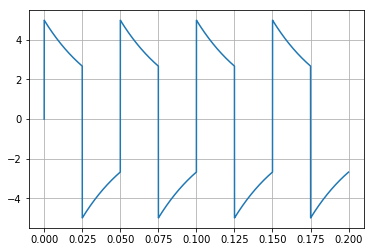

In [41]:
micro = 1 / 1000000.0
kilo = 1000.0

R = 2.0 * kilo
C = 20.0 * micro
tau = R*C

#print(T/resolution)

#discharge = np.exp(-(np.mod(t-(T/resolution), T/2)) / tau) #* np.sign(sin)
discharge = np.exp(-(np.mod(t-0.00000001, T/2)) / tau) #* np.sign(sin)

plt.plot(t, square * discharge)
plt.grid()
plt.show()

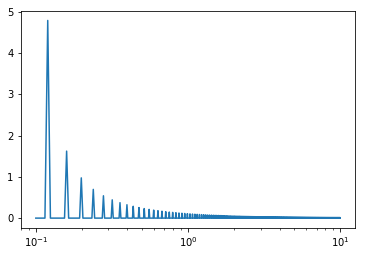

In [42]:
#print(len(square))
N = len(square)
yf = scipy.fftpack.fft(square * discharge, N)
xf = np.linspace(0.1, 1.0/(2.0*T), N//2)
plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.xscale('log')